In [1]:
%matplotlib inline

In [2]:
import jax
from jax.config import config
config.update("jax_enable_x64", True)

In [3]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import moscot.plotting as mpl
import pandas as pd
import os

sc.set_figure_params(scanpy=True, dpi=80, dpi_save=400)

import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

['default', 'despine']


In [4]:
output_dir = "."

In [5]:
tp0 = TemporalProblem.load("/lustre/groups/ml01/workspace/moscot_paper/pancreas/TemporalProblem.pkl")

In [6]:
order_celltypes = ['Ngn3 low', 'Ngn3 high cycling', 'Ngn3 high', 'Eps. progenitors', 'Fev+', 'Fev+ Alpha', 
                   'Fev+ Beta', 'Fev+ Delta', 'Alpha', 'Beta', 'Delta', 'Epsilon']

In [7]:
color_dict = { 'Prlf. Ductal': '#f7b6d2', 'Ductal': '#d62728', 'Imm. Acinar': '#ffeb3b', 'Mat. Acinar': '#98df8a',
    'Alpha': '#1f77b4', 'Beta': '#ff7f0e', 'Delta': '#279e68', 'Eps. progenitors': '#aa40fc', 'Epsilon': '#8c564b',
       'Fev+': '#e377c2', 'Fev+ Alpha': '#b5bd61', 'Fev+ Beta': '#42f5ec', 'Fev+ Delta': '#aec7e8', 'Fev+ Delta,0': '#17becf', 'Fev+ Delta,1':'#98df8a',
    'Ngn3 high cycling': '#adf542',
        'Ngn3 high,0': '#ff9896', 'Ngn3 high': '#ff9896', 'Ngn3 high,1':'#f0b98d', 'Ngn3 low': '#c5b0d5'
}

In [8]:
tp0.adata.uns["refinement_colors"] = [color_dict[ct] for ct in tp0.adata.obs["refinement"].cat.categories]

In [9]:
_ = tp0.cell_transition(14.5, 15.5, {"celltype": order_celltypes}, {"celltype": order_celltypes}, forward=True)

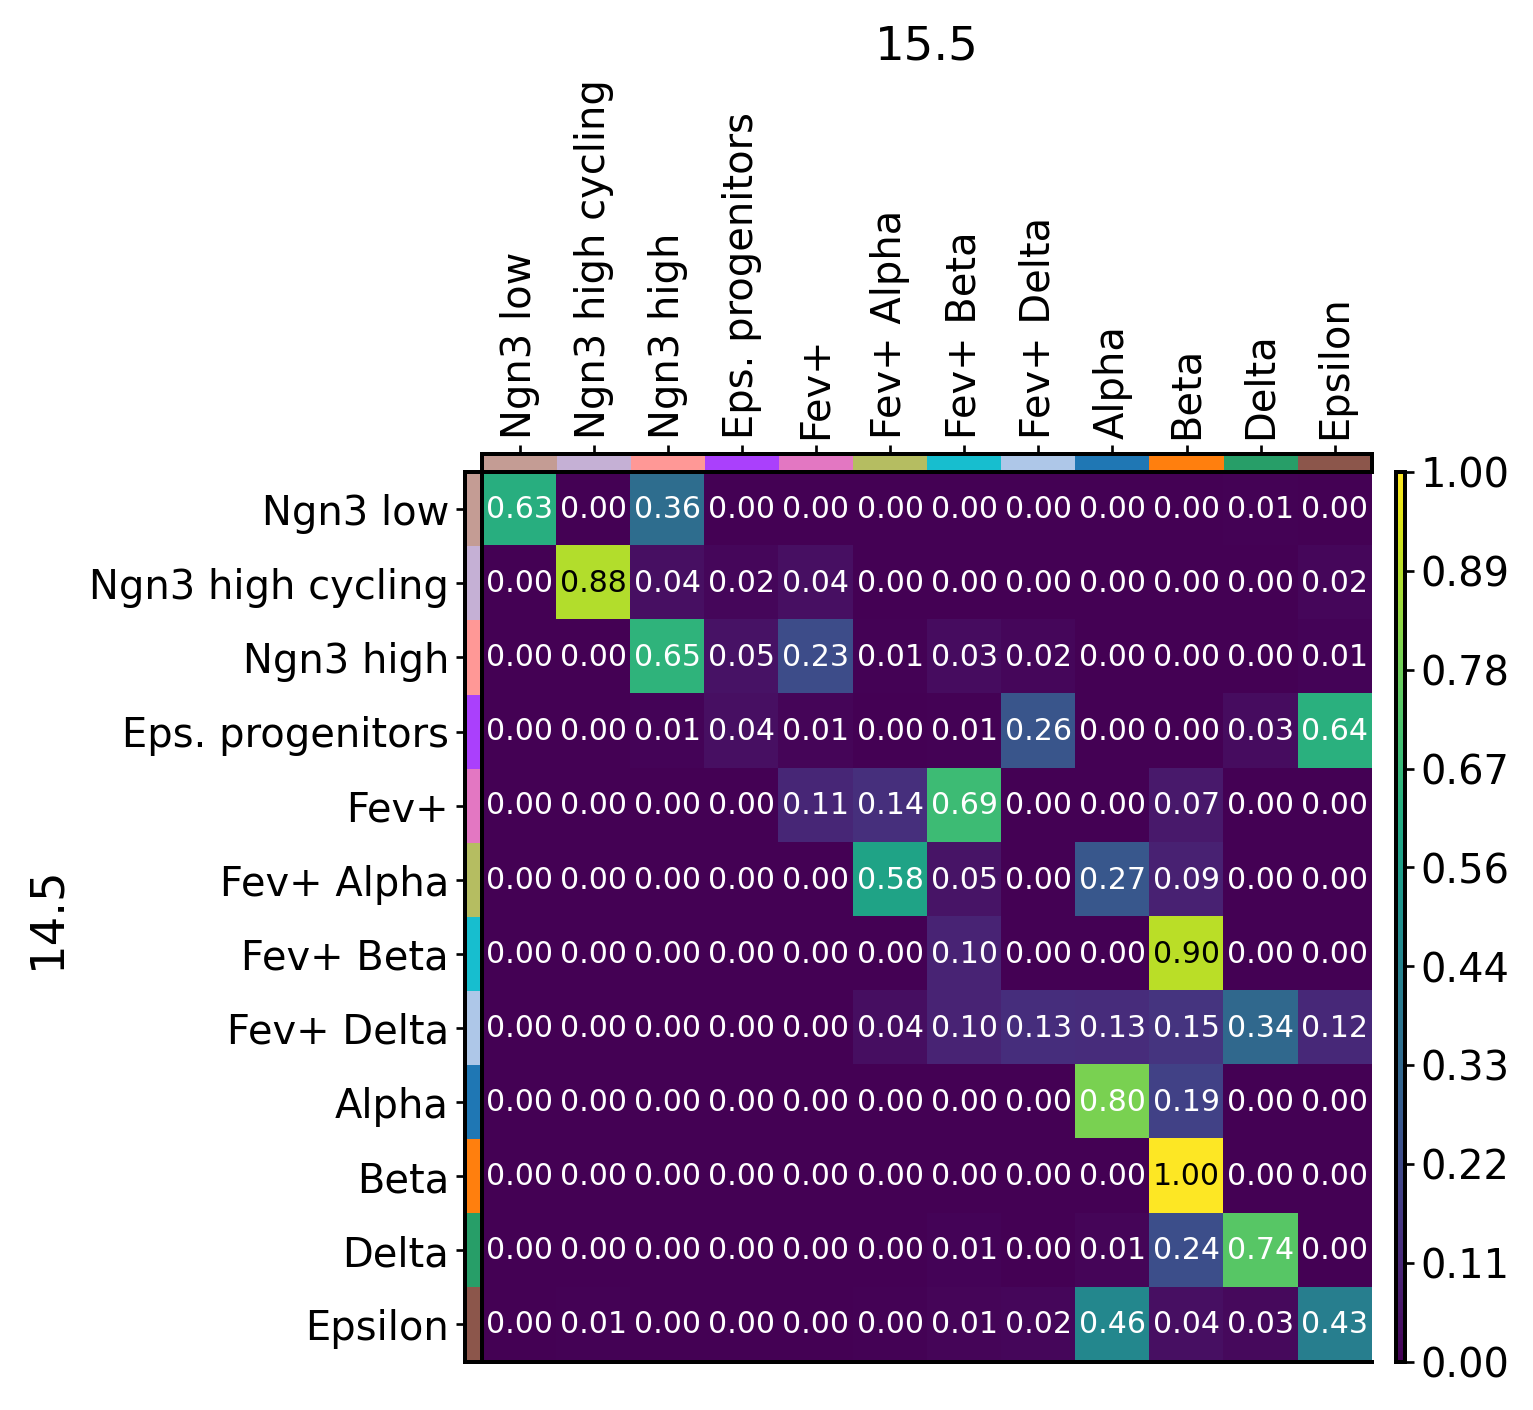

In [10]:
mpl.cell_transition(tp0, dpi=120, fontsize=9, save=os.path.join(output_dir, "cell_transition_endocrine_forward.png"))

In [11]:
_ = tp0.cell_transition(14.5, 15.5, {"celltype": order_celltypes}, {"celltype": order_celltypes}, forward=False)

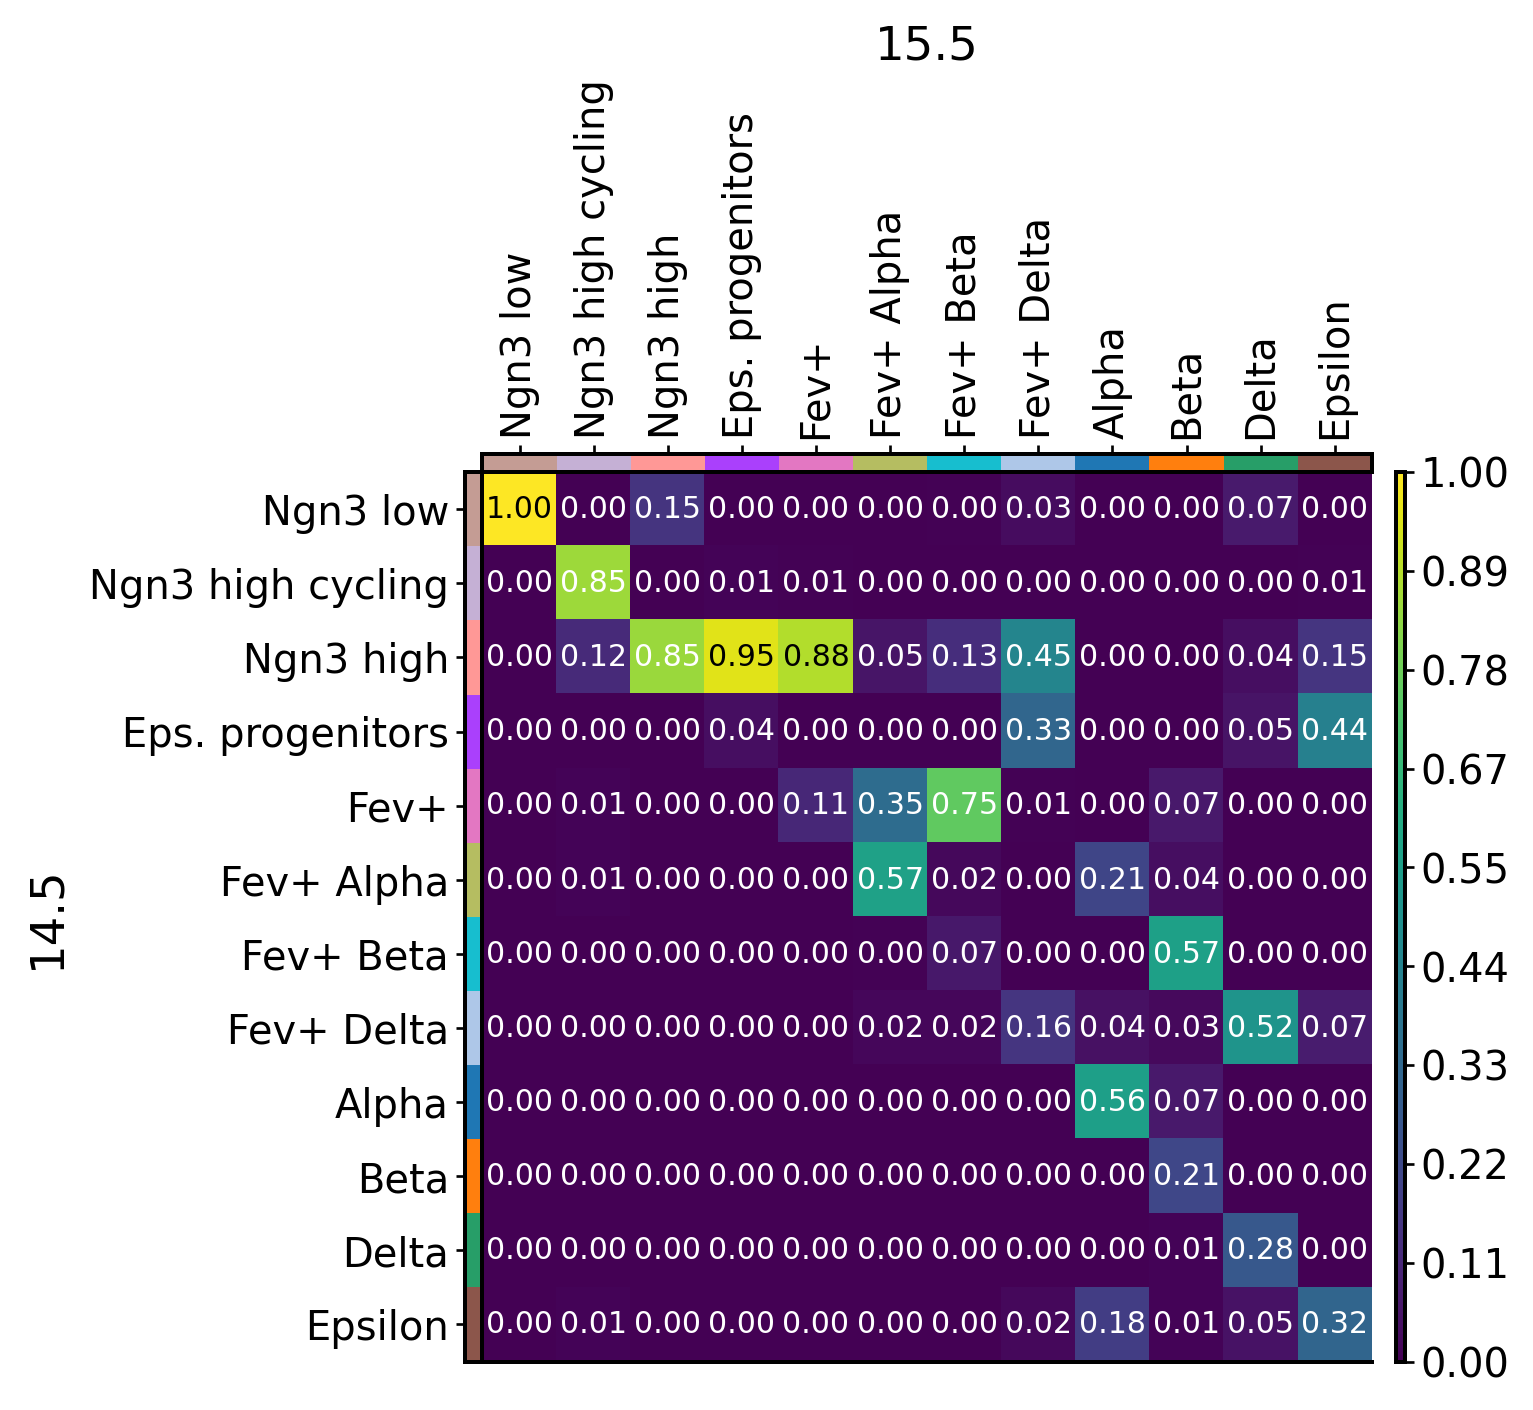

In [12]:
mpl.cell_transition(tp0, dpi=120, fontsize=9, save=os.path.join(output_dir, "cell_transition_endocrine_backward.png"))

In [13]:
cluster_subset = ["Ngn3 high,1", "Eps. progenitors", "Fev+ Delta,0", "Fev+ Delta,1", "Alpha", "Beta", "Delta", "Epsilon"]

In [14]:
_ = tp0.cell_transition(14.5, 15.5, {"refinement": cluster_subset}, {"refinement": cluster_subset}, forward=True)

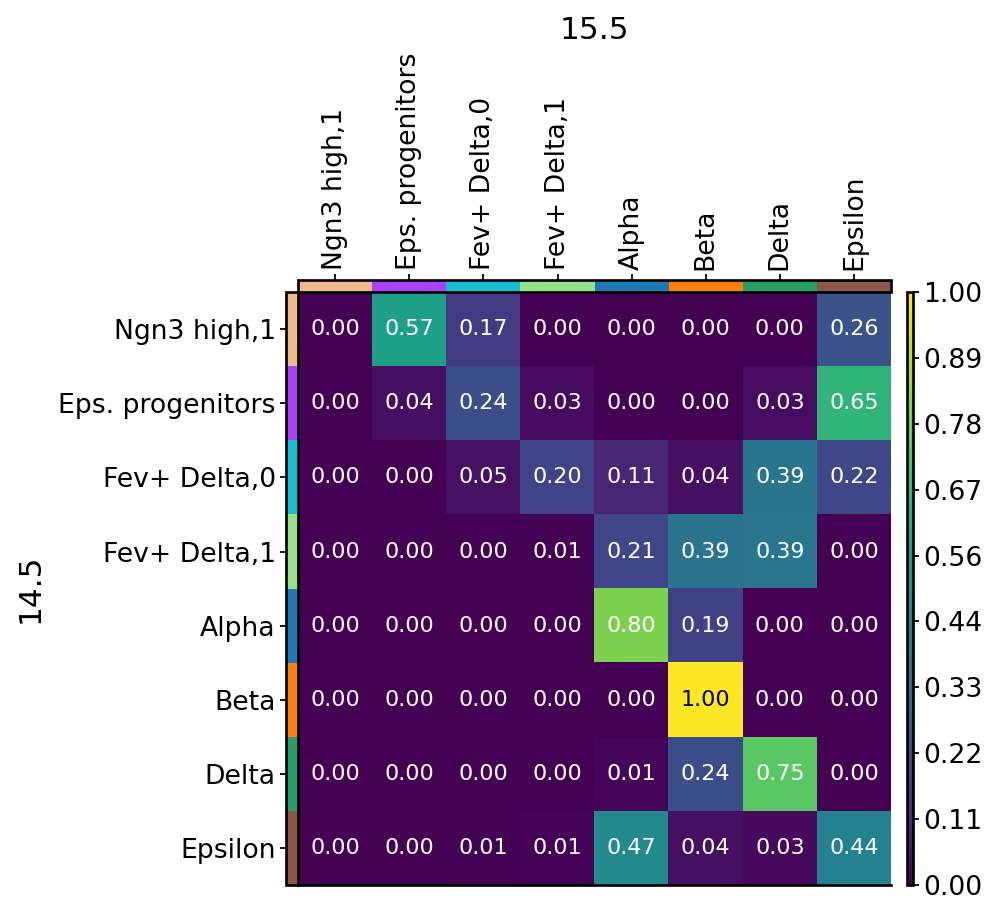

In [15]:
fig = mpl.cell_transition(tp0, dpi=80, fontsize=10, save="cell_transition_reduced_forward_annotation.png")

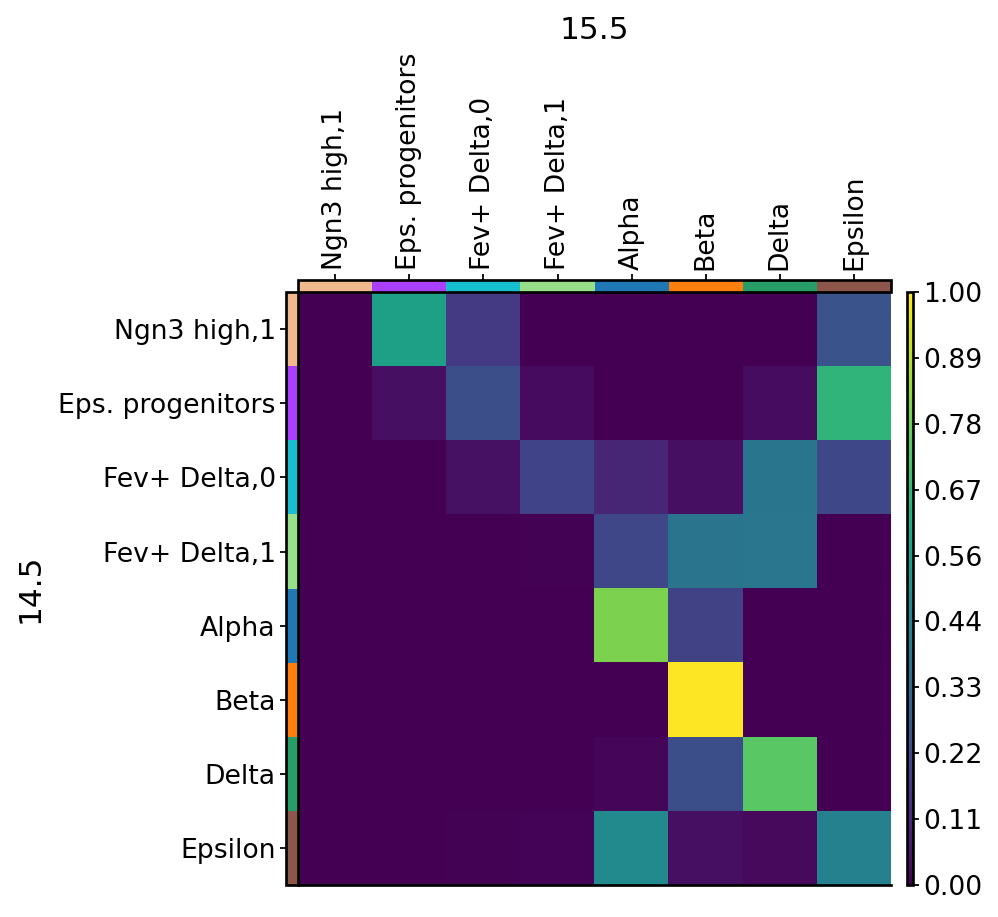

In [16]:
fig = mpl.cell_transition(tp0, dpi=80, annotate=None, save="cell_transition_reduced_forward.png")

In [17]:
tp0.sankey(source=14.5, target=15.5, source_groups={"refinement": cluster_subset[::-1]}, target_groups={"refinement": cluster_subset[::-1]}, threshold=0.05, normalize=True)


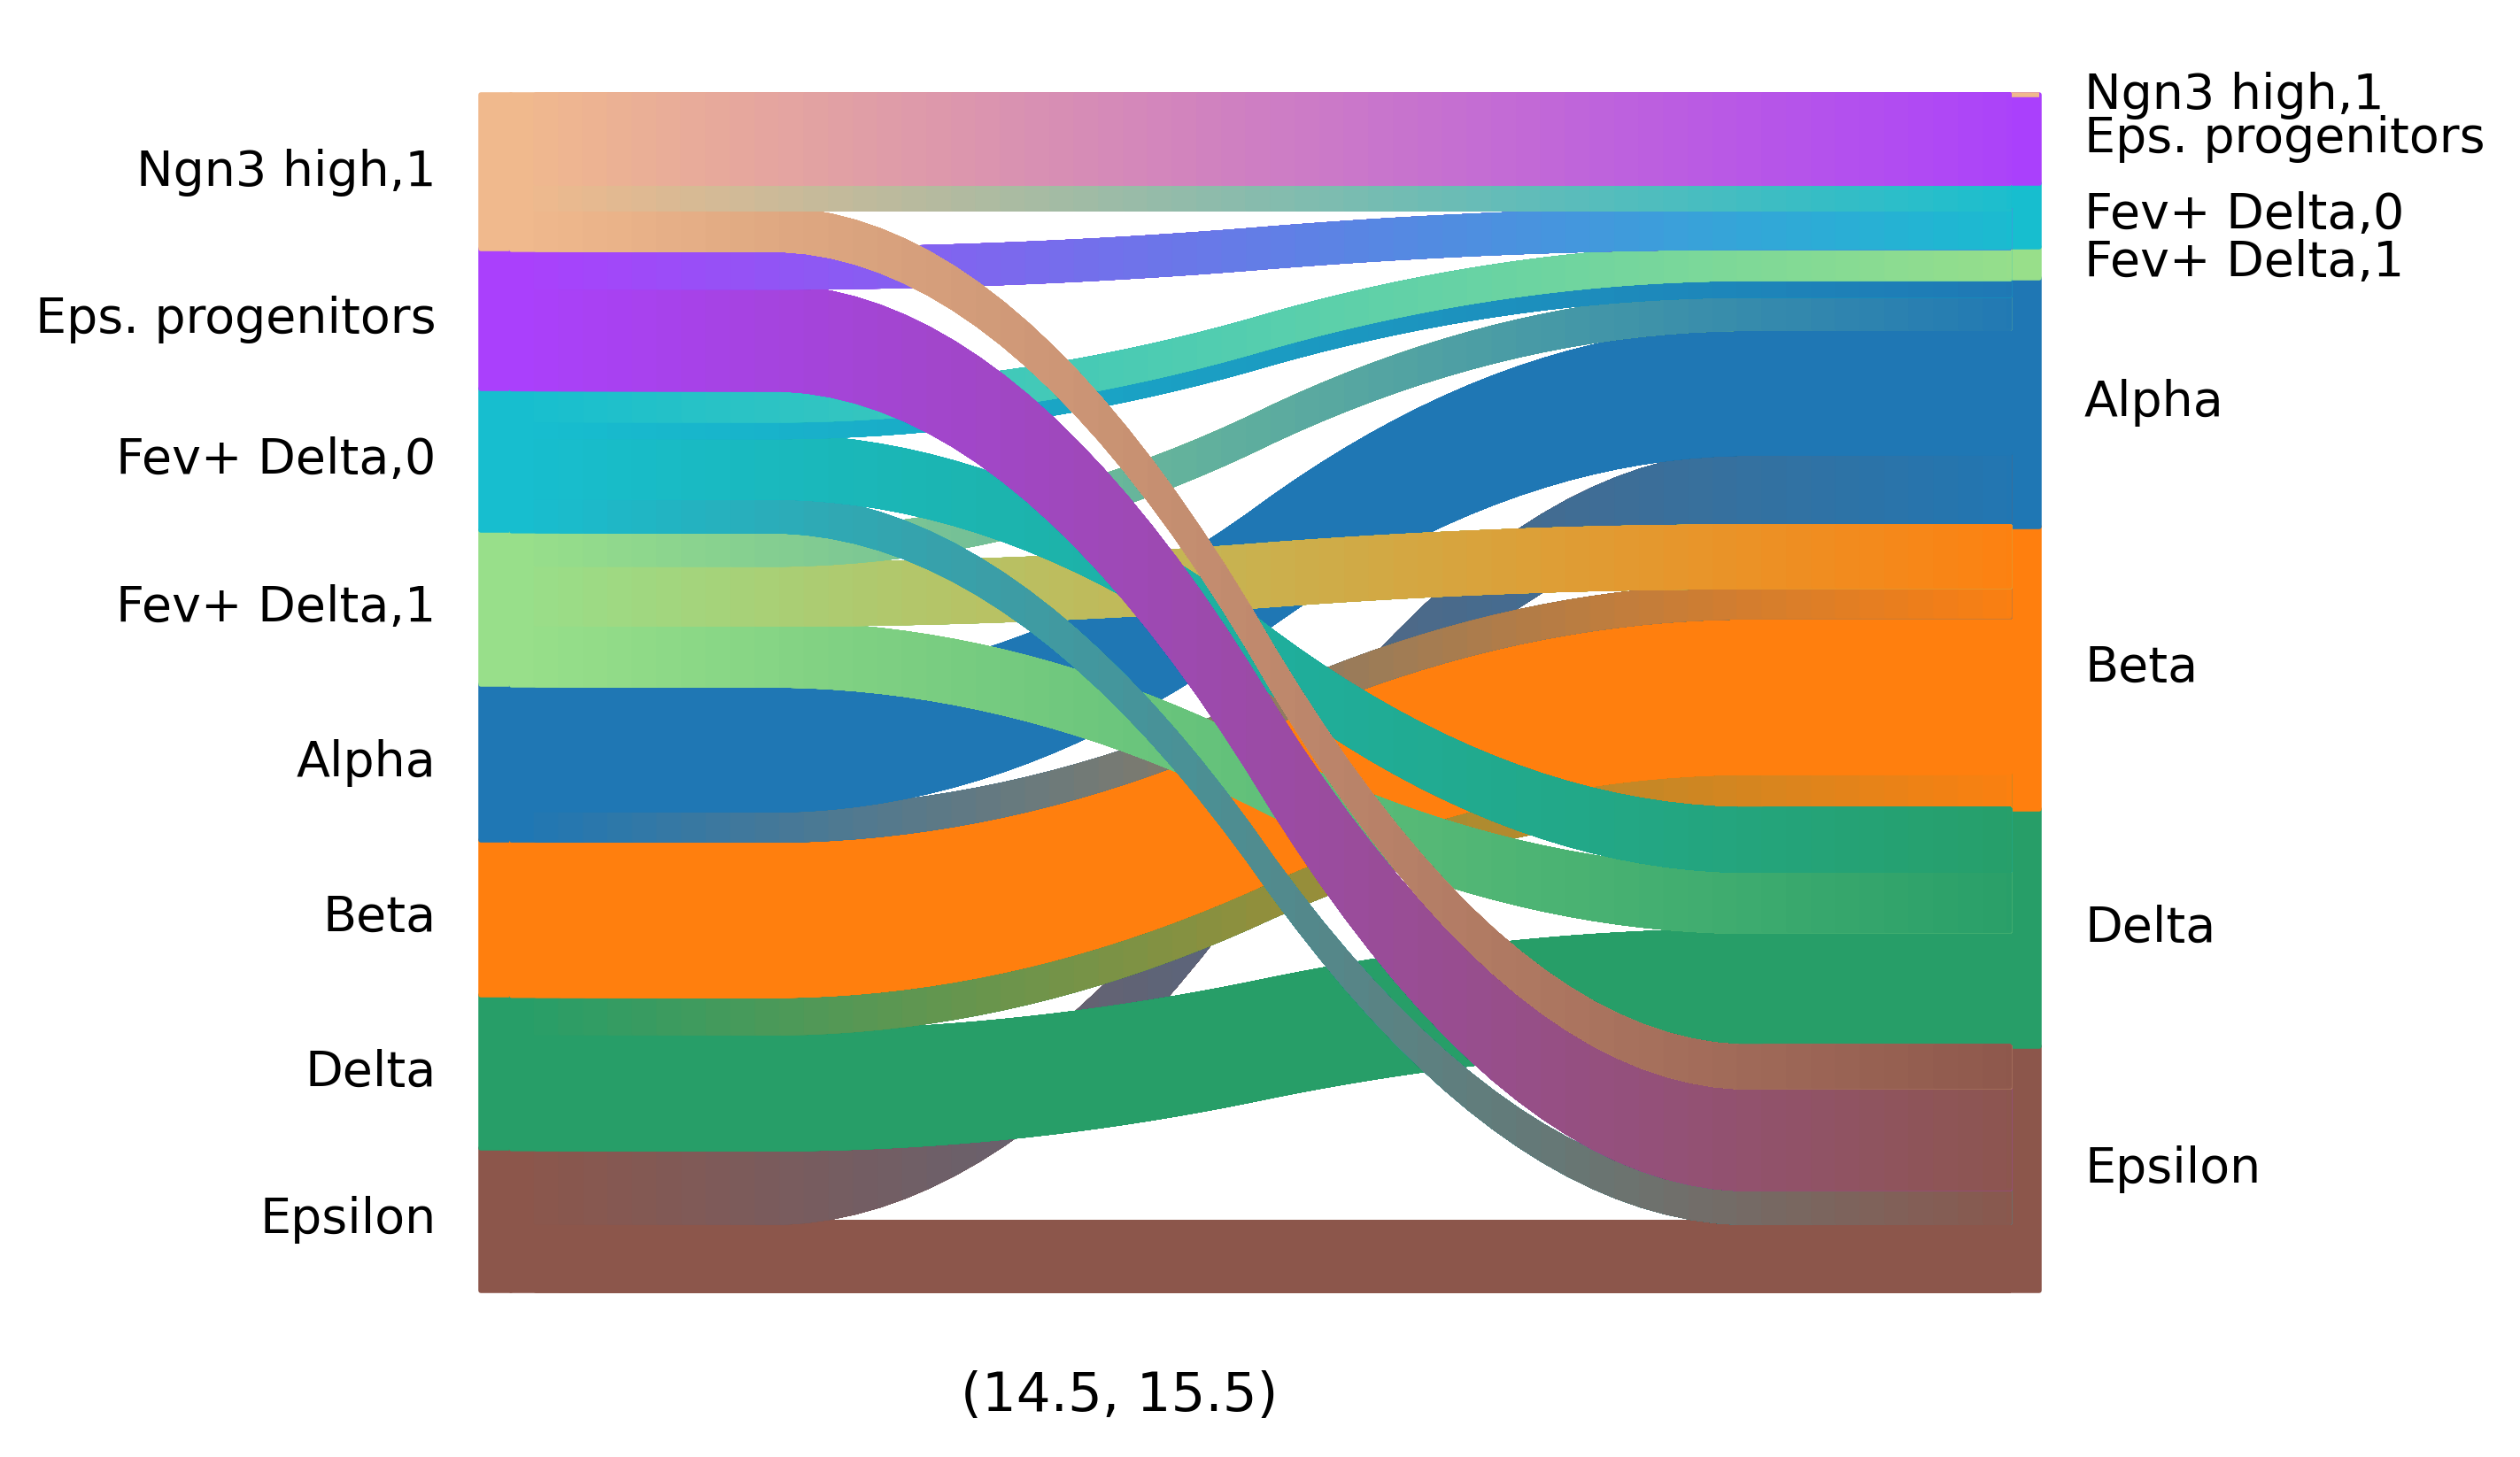

In [18]:
mpl.sankey(tp0, dpi=200, figsize=(7,4), fontsize=10, interpolate_color=True, save=os.path.join(output_dir, "sankey_forward_endocrine.png"))

In [24]:
tp0.sankey(source=14.5, target=15.5, forward=False, source_groups={"refinement": cluster_subset[::-1]}, target_groups={"refinement": cluster_subset[::-1]}, threshold=0.05, normalize=True)


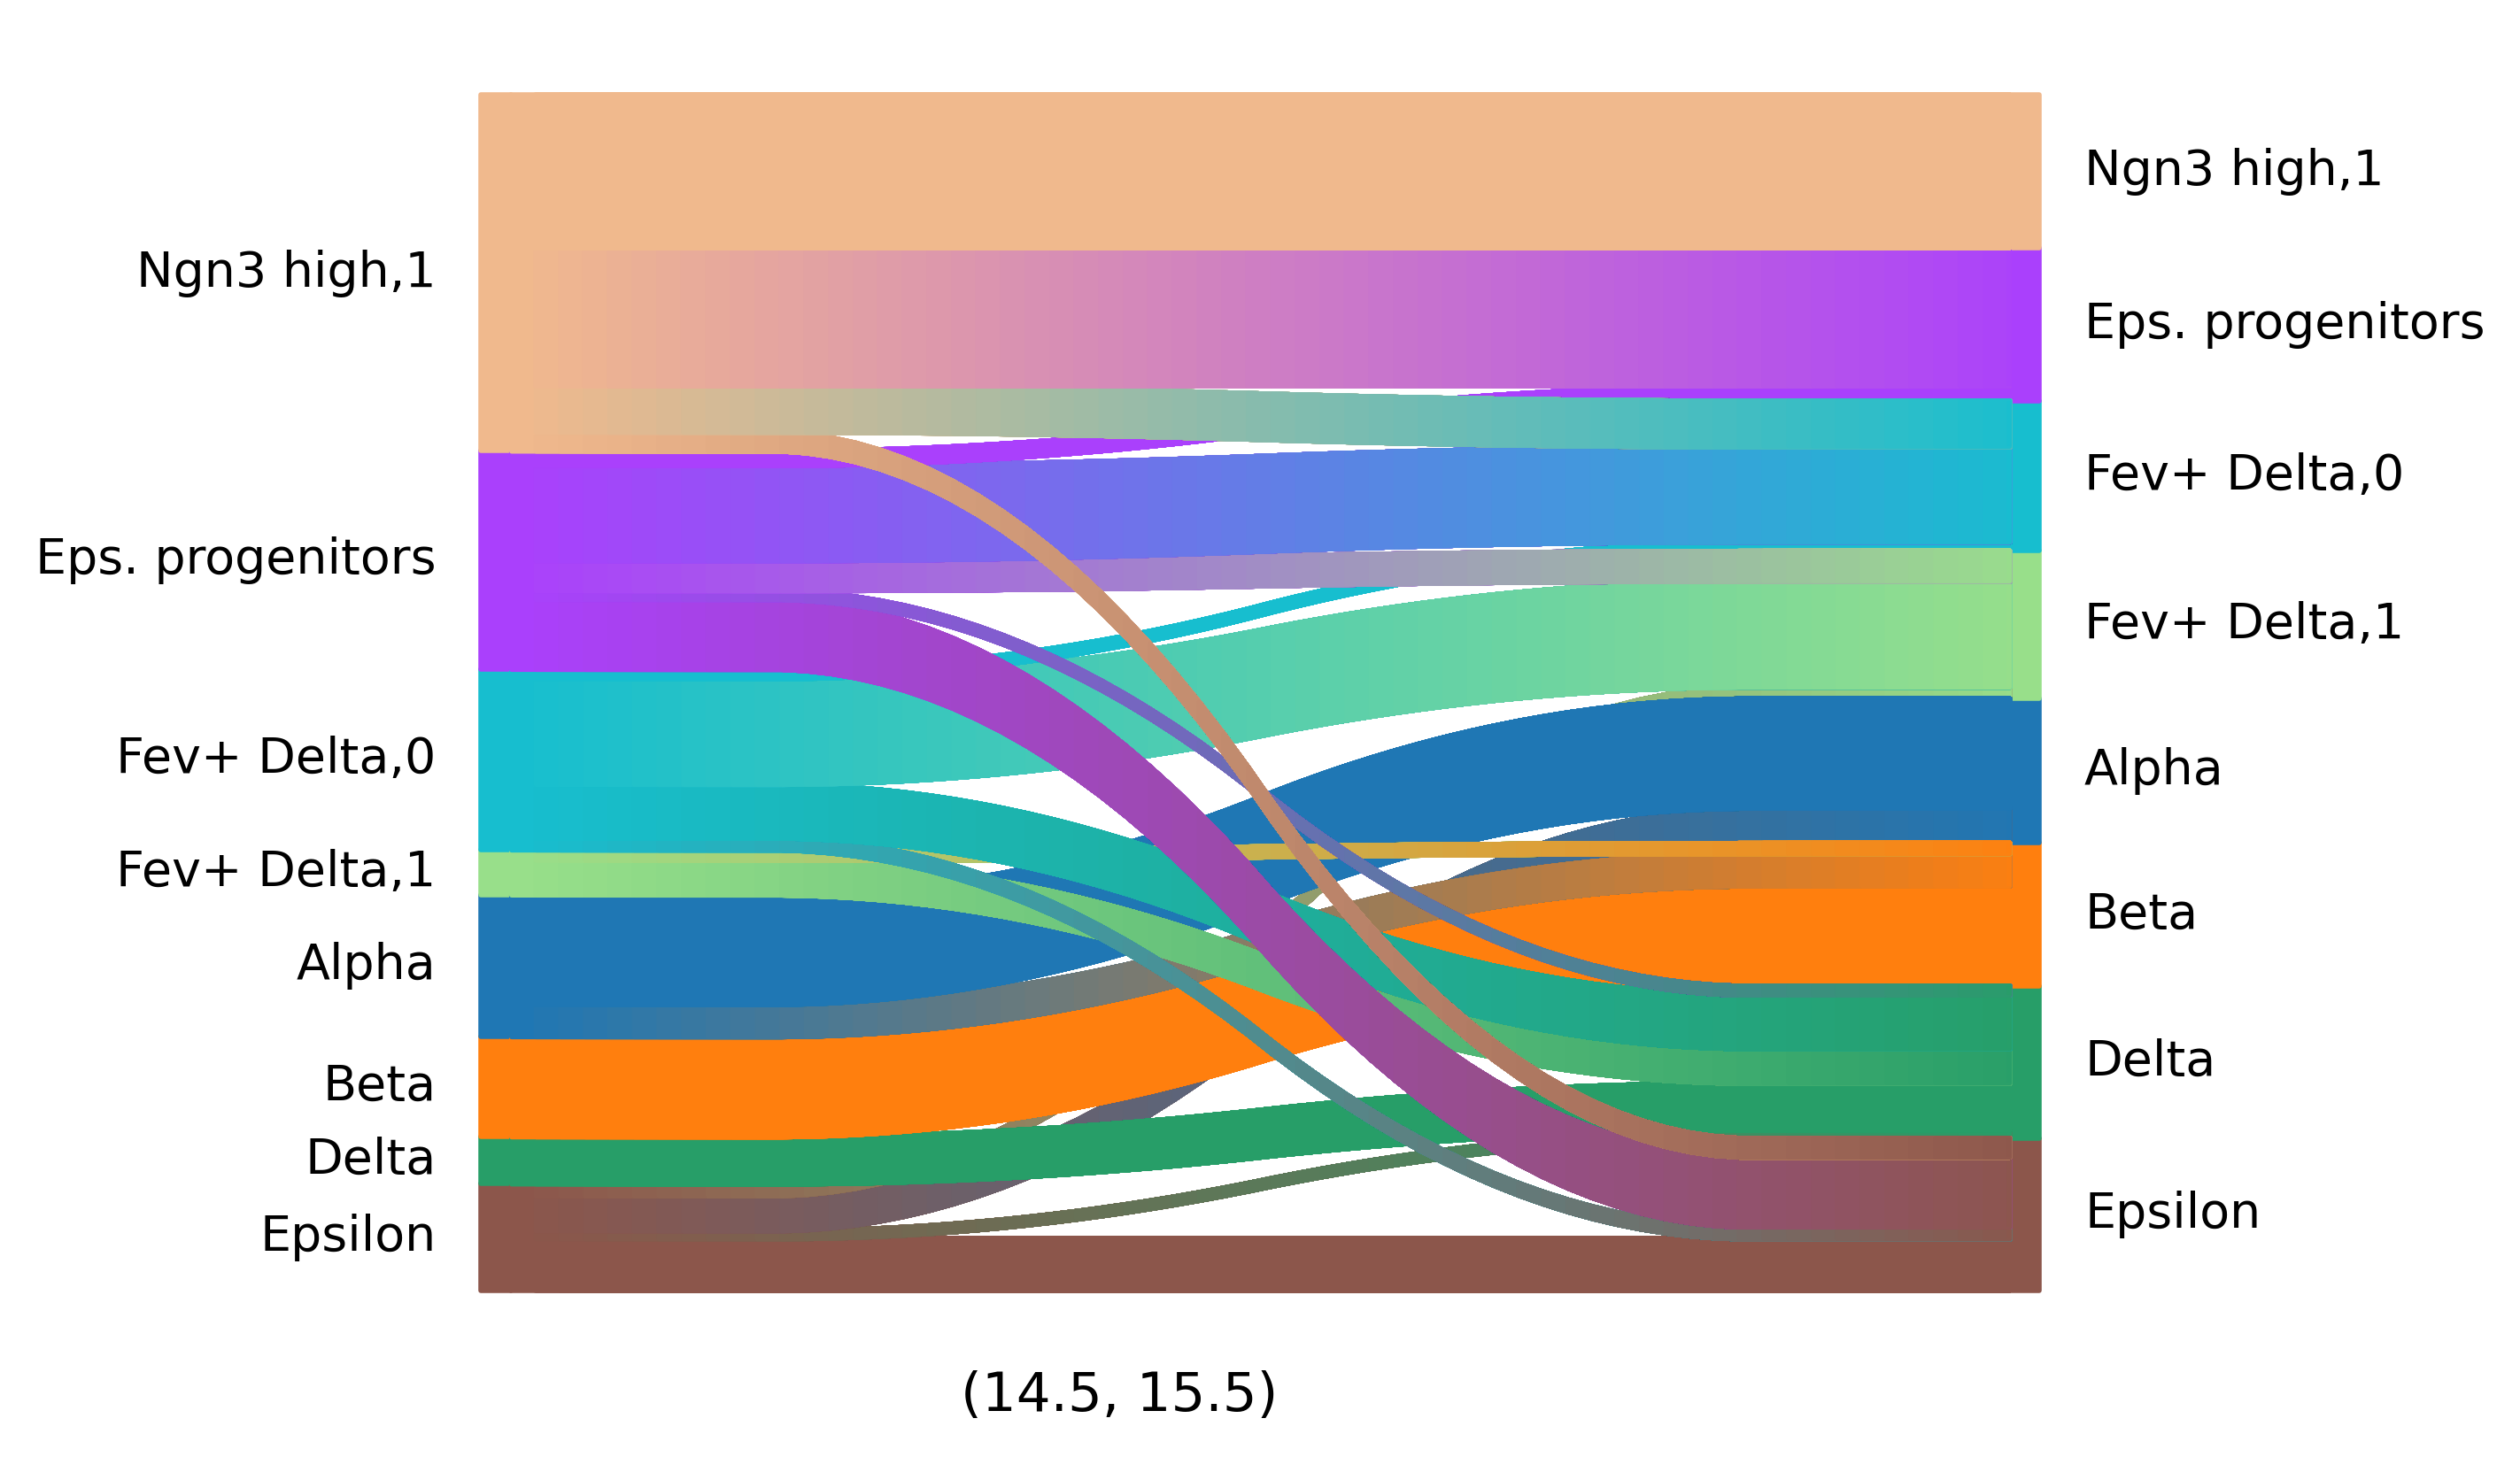

In [25]:
mpl.sankey(tp0, dpi=200, figsize=(7,4), fontsize=10,  interpolate_color=True, save=os.path.join(output_dir, "sankey_backward_endocrine.png"))

In [21]:
_ = tp0.cell_transition(14.5, 15.5, {"refinement": cluster_subset}, {"refinement": cluster_subset}, forward=False)

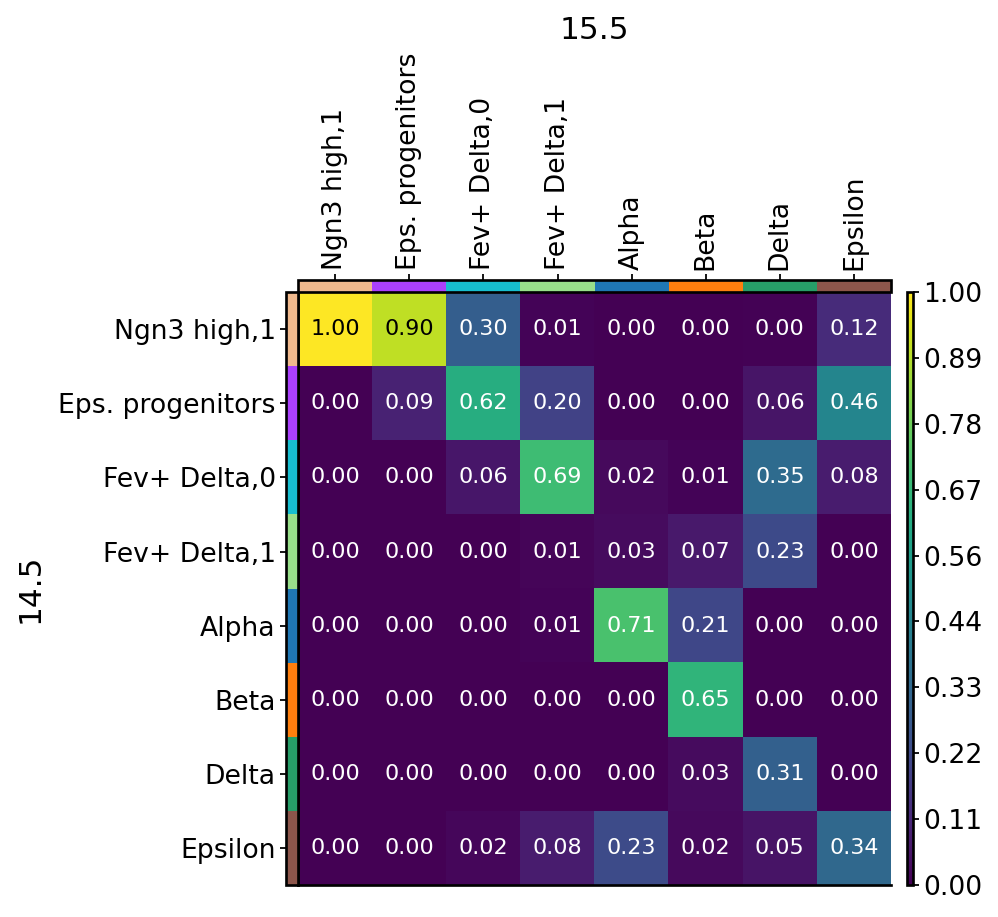

In [22]:
fig = mpl.cell_transition(tp0, dpi=80, fontsize=10, save="cell_transition_reduced_backward_annotation.png")

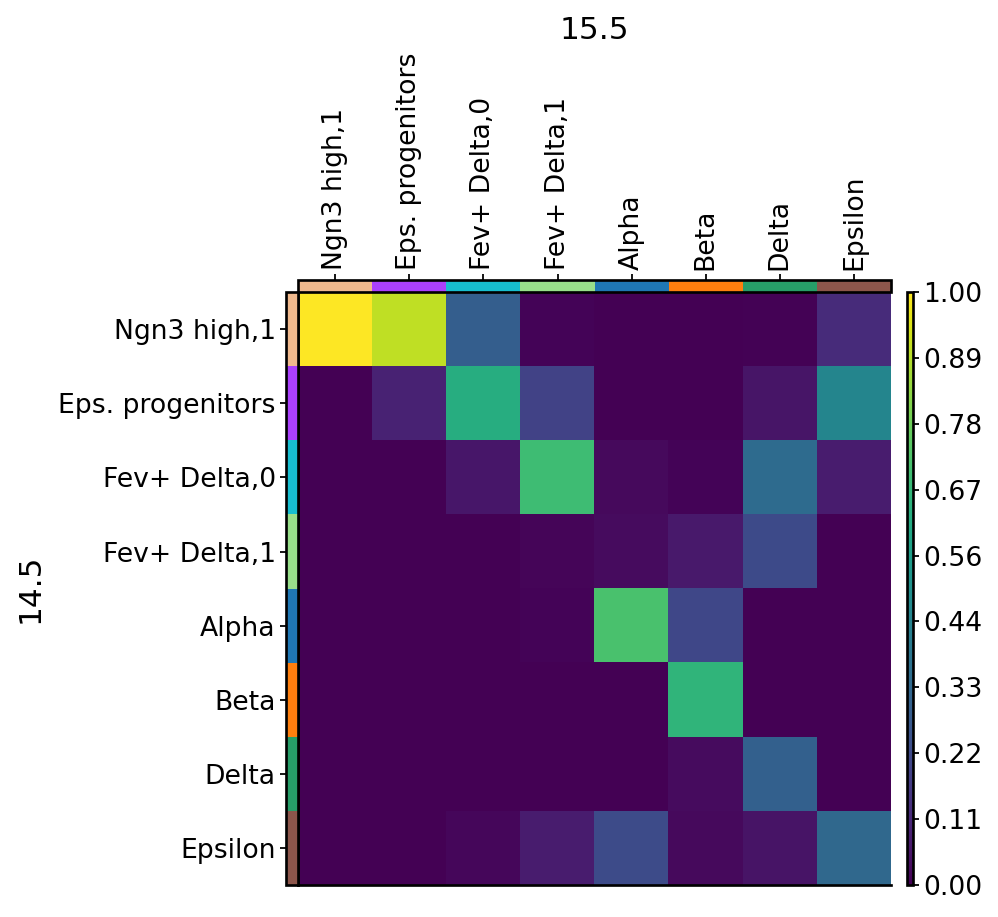

In [23]:
fig = mpl.cell_transition(tp0, dpi=80, annotate=None, save="cell_transition_reduced_backward.png")